In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
songs = pd.read_csv('./data/spotify_millsongdata.csv')

In [20]:
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [21]:
songs = songs.sample(n=5000).drop('link', axis=1).reset_index(drop=True)
songs['text'] = songs['text'].str.replace(r'\n', '', regex=True)

In [22]:
songs

,artist,song,text
0,Xzibit,1983,"I had the right to sublurr, because they ache ..."
1,Tina Turner,Acid Queen,If your child ain't all he should be now \rTh...
2,Pitbull,Freek,"Baby, forget about me \rJust tell me what you..."
3,Planetshakers,Worship The King,Walking down the road called life \rThinking ...
4,Squeeze,I Think I'm Go Go,Funny words I cannot read \rTrams and boats w...
...,...,...,...
4995,Hank Williams,My Sweet Love Ain't Around,Listen to the rain a-fallin' \rCan't you hear...
4996,Neil Young,High School Graduation,The brick jail doors that closed behind are cr...
4997,Nitty Gritty Dirt Band,The Cure,I thought I'd give my love to anyone today \r...
4998,Judas Priest,Last Rose Of Summer,Throughout the soft and timeless days of Augus...


In [23]:
text_input = """Wise men say
Only fools rush in
But I can't help falling in love with you
Shall I stay?
Would it be a sin
If I can't help falling in love with you?
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
For I can't help falling in love with you"""

In [24]:
songs.iloc[0]

artist                                               Xzibit
song                                                   1983
text      I had the right to sublurr, because they ache ...
Name: 0, dtype: object

In [25]:
songs2: pd.DataFrame = songs.append(songs.iloc[0])

C:\Users\gunsr\AppData\Local\Temp\ipykernel_9068\675547088.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  songs2: pd.DataFrame = songs.append(songs.iloc[0])


In [26]:
songs2

,artist,song,text
0,Xzibit,1983,"I had the right to sublurr, because they ache ..."
1,Tina Turner,Acid Queen,If your child ain't all he should be now \rTh...
2,Pitbull,Freek,"Baby, forget about me \rJust tell me what you..."
3,Planetshakers,Worship The King,Walking down the road called life \rThinking ...
4,Squeeze,I Think I'm Go Go,Funny words I cannot read \rTrams and boats w...
...,...,...,...
4996,Neil Young,High School Graduation,The brick jail doors that closed behind are cr...
4997,Nitty Gritty Dirt Band,The Cure,I thought I'd give my love to anyone today \r...
4998,Judas Priest,Last Rose Of Summer,Throughout the soft and timeless days of Augus...
4999,Rascal Flatts,Dry County Girl,A tall drink of water in a cotton dress \rTha...


In [27]:
songs2.loc[songs2.index[-1], 'text'] = text_input
songs2.loc[songs2.index[-1], 'song'] = "Input_Song"
songs2


,artist,song,text
0,Xzibit,Input_Song,Wise men say\nOnly fools rush in\nBut I can't ...
1,Tina Turner,Acid Queen,If your child ain't all he should be now \rTh...
2,Pitbull,Freek,"Baby, forget about me \rJust tell me what you..."
3,Planetshakers,Worship The King,Walking down the road called life \rThinking ...
4,Squeeze,I Think I'm Go Go,Funny words I cannot read \rTrams and boats w...
...,...,...,...
4996,Neil Young,High School Graduation,The brick jail doors that closed behind are cr...
4997,Nitty Gritty Dirt Band,The Cure,I thought I'd give my love to anyone today \r...
4998,Judas Priest,Last Rose Of Summer,Throughout the soft and timeless days of Augus...
4999,Rascal Flatts,Dry County Girl,A tall drink of water in a cotton dress \rTha...


In [28]:
documents = [f for f in songs['text']]

In [29]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_matrix = tfidf.fit_transform(documents)

In [30]:
print(lyrics_matrix, lyrics_matrix.shape)

  (0, 21231)	0.0407374808207026
  (0, 8389)	0.09636187038955189
  (0, 12043)	0.042555643605143856
  (0, 11332)	0.058015354801230344
  (0, 20137)	0.09636187038955189
  (0, 23439)	0.04596417686007564
  (0, 18135)	0.07299208009976198
  (0, 1867)	0.061887030758181236
  (0, 11103)	0.06794017335245442
  (0, 52)	0.09636187038955189
  (0, 5773)	0.05467197408344902
  (0, 7698)	0.05693019495280856
  (0, 18353)	0.06643155436962556
  (0, 12036)	0.07200300260035683
  (0, 20151)	0.044499241930737336
  (0, 23255)	0.10258609296104564
  (0, 8874)	0.03463598125051032
  (0, 18903)	0.05111832075091244
  (0, 18161)	0.10500493047362061
  (0, 19376)	0.05649622559128695
  (0, 14786)	0.07882823875318147
  (0, 21366)	0.047162886269771345
  (0, 7598)	0.05574315085272823
  (0, 14189)	0.07177748224680211
  (0, 12868)	0.09193414067355365
  :	:
  (4999, 4768)	0.5435299902997288
  (4999, 8856)	0.06601649332524989
  (4999, 18117)	0.0701596100714824
  (4999, 10339)	0.09446421633294291
  (4999, 2153)	0.06595226028628201

In [31]:
def create_heatmap(similarity, cmap = "YlGnBu"):
    df = pd.DataFrame(similarity)
    df.columns = songs[0:10]['song']
    df.index = songs[0:10]['song']
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df, cmap=cmap)

In [32]:
cosine_similarities = cosine_similarity(lyrics_matrix)

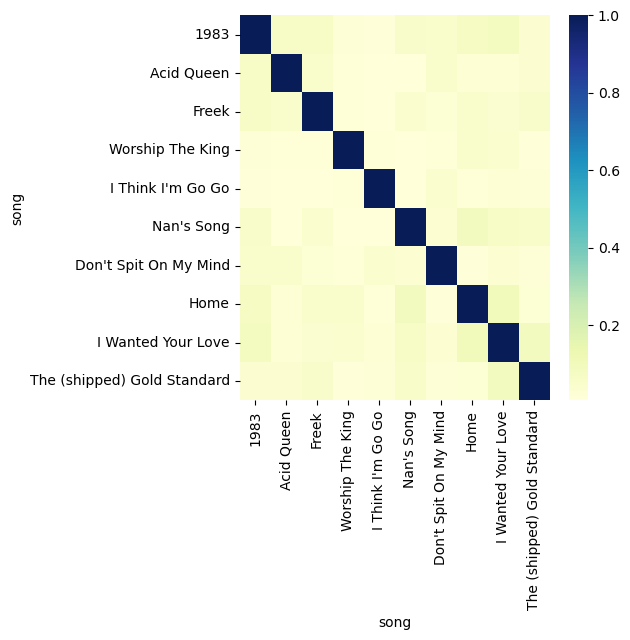

In [33]:
create_heatmap(similarity = cosine_similarities[0:10, 0:10])

In [34]:
similarities = {}

for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-50:-1]
    similarities[songs2['song'].iloc[i]] = [(cosine_similarities[i][x], songs2['song'][x], songs2['artist'][x]) for x in similar_indices][1:]

In [35]:
class Recommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]}")
            print("--------------------")
        
    def recommend(self, recommendation):
        song = recommendation['song']
        number_songs = recommendation['number_songs']
        recom_song = self.matrix_similar[song][:number_songs]
        self._print_message(song=song, recom_song=recom_song)

In [36]:
recommedations = Recommender(similarities)

In [37]:
recommendation2 = {
    "song": songs['song'].iloc[-1],
    "number_songs": 5
}
recommedations.recommend(recommendation2)

The 5 recommended songs are:
Number 1:
Bone Dry by George Jones
--------------------
Number 2:
My Girl by Phil Collins
--------------------
Number 3:
Black Girl by Lenny Kravitz
--------------------
Number 4:
Girl Like You by Def Leppard
--------------------
Number 5:
Another Girl by The Beatles
--------------------
